In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-dataset/IPL_deliveries.csv


# The IPL dataset contains information about matches played in the Indian Premier League (IPL), a professional Twenty20 cricket league in India. The dataset captures various aspects of the matches, such as batting and bowling details, innings, teams, runs scored, wickets taken, extras, and player dismissals.
### Innings: Represents the innings number of the match (e.g., "1st innings", "2nd innings").
### Batting_team: Indicates the name of the team that is batting.
### Bowling_team: Indicates the name of the team that is bowling.
### Over: Indicates the over number during which an event occurred (e.g., "1", "2", "3").
### Ball: Represents the ball number within an over (e.g., "1", "2", "3").
### Batsman: Indicates the name of the batsman.
### Non-striker: Indicates the name of the non-striking batsman.
### Bowler: Indicates the name of the bowler.
### is_super_over: Represents whether the over is a super over or not (0 for regular over, 1 for super over).
### wide_runs: Represents the number of wide runs awarded.
### bye_runs: Represents the number of bye runs scored.
### legbye_runs: Represents the number of legbye runs scored.
### noball_runs: Represents the number of no-ball runs awarded.
### penalty_runs: Represents the number of penalty runs awarded.
### Batsman_runs: Represents the number of runs scored by the batsman.
### Extra_runs: Represents the total number of extra runs (wide, bye, legbye, noball, penalty) scored in the ball.
### Total_runs: Represents the total runs scored in the ball (including extra runs).
### player_dismissed: Indicates the name of the dismissed player (if any).
### dismissal_kind: Represents the type of dismissal (e.g., "caught", "bowled", "run out").
### fielder: Indicates the name of the fielder involved in the dismissal (if applicable).


In [2]:
ipl = pd.read_csv("/kaggle/input/ipl-dataset/IPL_deliveries.csv")
ipl

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [3]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [4]:
ipl['over'] = ipl['over'].astype(str)
ipl['ball'] = ipl['ball'].astype(str)
ipl['inning'] = ipl['inning'].astype(str)
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  object
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  object
 5   ball              179078 non-null  object
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [5]:
ipl = ipl.rename(columns={'inning':'Innings', 'batting_team':'Batting_Team', 'bowling_team':'Bowling_Team', 'over':'Over','ball':'Ball', 'batsman':'Batsman', 'non-striker':'Non-striker', 'bowler':'Bowler', 'batsman_runs':'Batsman_Runs', 'extra_runs':'Extra_Runs', 'total_runs':'Total_runs'})
ipl

,match_id,Innings,Batting_Team,Bowling_Team,Over,Ball,Batsman,non_striker,Bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,Batsman_Runs,Extra_Runs,Total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [6]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   Innings           179078 non-null  object
 2   Batting_Team      179078 non-null  object
 3   Bowling_Team      179078 non-null  object
 4   Over              179078 non-null  object
 5   Ball              179078 non-null  object
 6   Batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   Bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  Batsman_Runs      179078 non-null  int64 
 16  Extra_Runs        179078 non-null  int

In [7]:
ipl['Innings'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [8]:
ipl['Innings'] = ipl['Innings'].replace('5','2')
ipl['Innings'].unique()

array(['1', '2', '3', '4'], dtype=object)

#### The innings - 3,4 are due to super overs

In [9]:
ipl['Over'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20'], dtype=object)

In [10]:
ipl['Ball'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

#### The unique values - 7,8,9 are due to the no-balls bowled in the over

In [11]:
ipl['Batting_Team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [12]:
ipl['Batting_Team'] = ipl['Batting_Team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
ipl['Batting_Team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

In [13]:
ipl['Bowling_Team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [14]:
ipl['Bowling_Team'] = ipl['Bowling_Team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
ipl['Bowling_Team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Delhi Capitals'], dtype=object)

## 1) What is the distribution of runs scored by each team? Can we identify any trends or outliers?

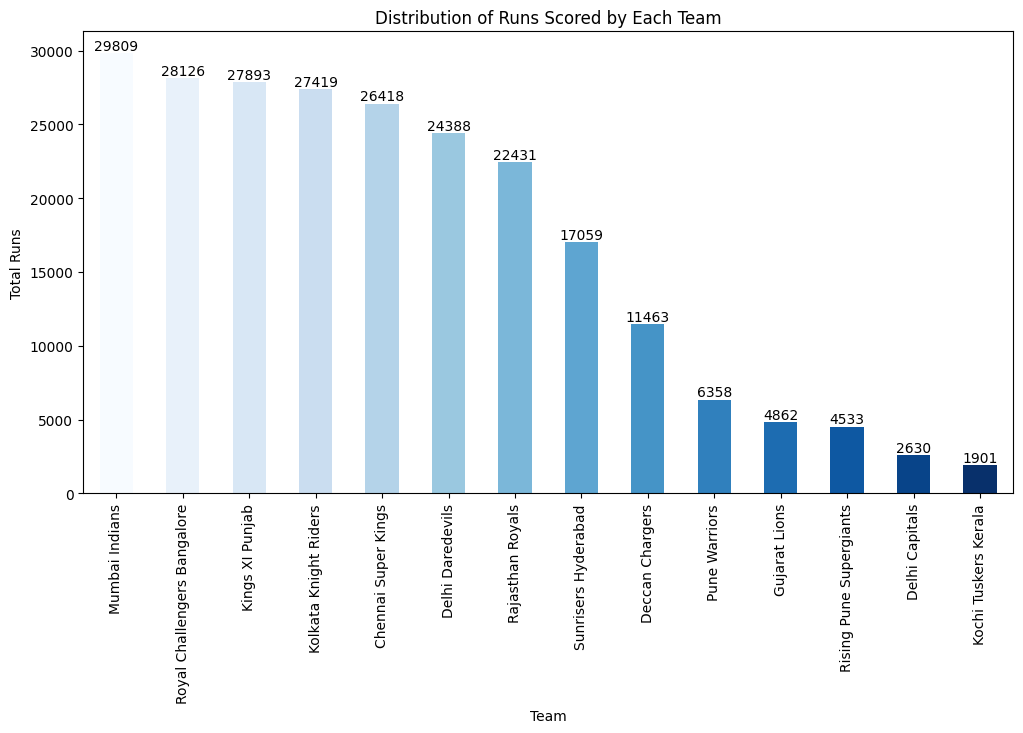

In [15]:
import matplotlib.pyplot as plt

runs_by_team = ipl.groupby('Batting_Team')['Total_runs'].sum()
runs_by_team = runs_by_team.sort_values(ascending=False)

plt.figure(figsize=(12, 6))

cmap = plt.cm.get_cmap('Blues', len(runs_by_team))

runs_by_team.plot(kind='bar', color=cmap(np.arange(len(runs_by_team))))

for i, v in enumerate(runs_by_team):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.title('Distribution of Runs Scored by Each Team')
plt.xticks(rotation=90)
plt.show()

#### Mumbai Indians have scored highest amount of runs over the past editions of the IPL combined while teams who have played only 1 or 2 editions of the IPL like Gujarat Lions, Kochi Tuskers etc have accounted in lesser runs for obvious reasons. Out of present teams for all IPL editions, Rajasthan Royals have scored less runs in all the editions of IPL

## 2) How does the average number of runs scored in super overs compare to regular overs?

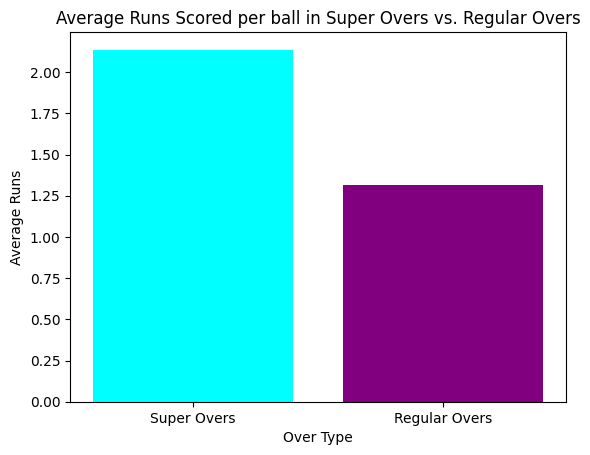

In [16]:
super_overs = ipl[ipl['is_super_over'] == 1]
regular_overs = ipl[ipl['is_super_over'] == 0]

avg_runs_super_overs = super_overs['Total_runs'].mean()
avg_runs_regular_overs = regular_overs['Total_runs'].mean()

averages = [avg_runs_super_overs, avg_runs_regular_overs]
labels = ['Super Overs', 'Regular Overs']

colors = ['cyan','purple']
plt.bar(labels, averages, color = colors)
plt.xlabel('Over Type')
plt.ylabel('Average Runs')
plt.title('Average Runs Scored per ball in Super Overs vs. Regular Overs')

plt.show()

#### From the above plot, we could say that the avergare runs scored per ball is higher in super-overs than the regular 20 odd overs

## 3) How many runs are scored in each over of the match?

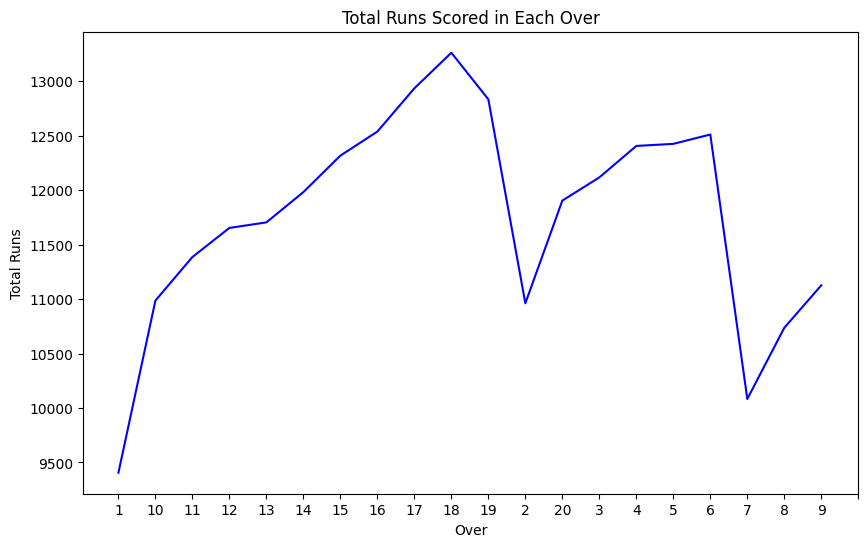

In [17]:
runs_per_over = ipl.groupby('Over')['Total_runs'].sum()

# Create a line graph to visualize the runs scored in each over
plt.figure(figsize=(10, 6))
plt.plot(runs_per_over.index, runs_per_over.values, color='blue')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.title('Total Runs Scored in Each Over')
plt.xticks(range(0, len(runs_per_over) + 1))
plt.show()

#### High amount of runs are scored in later half of the innings (from 10-20 overs) especially during death overs from 15-20.

## 4) What is the distribution of different types of dismissals in the dataset?

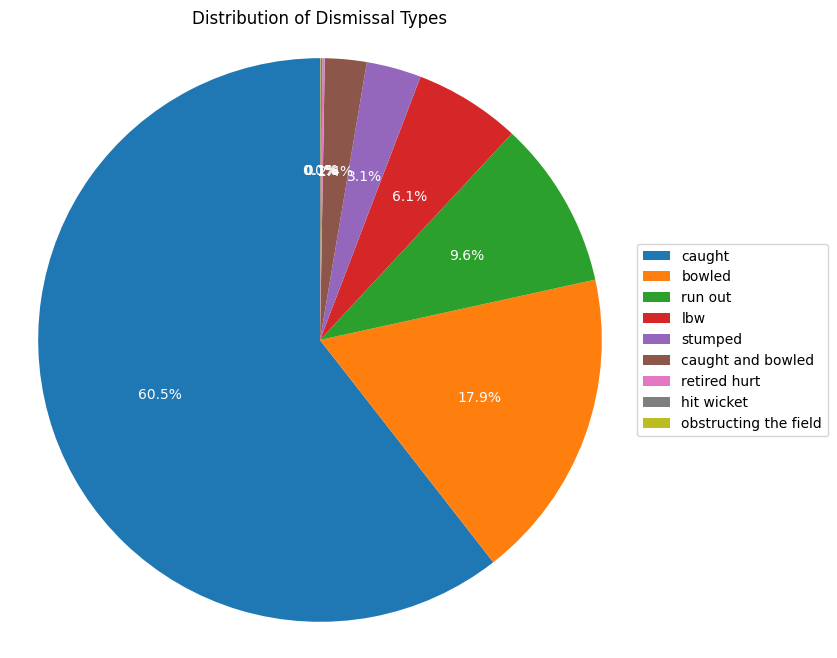

In [18]:
dismissals_count = ipl['dismissal_kind'].value_counts()

# Create a pie chart to visualize the distribution of dismissals
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(dismissals_count, labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Dismissal Types')

# Create a legend with dismissal types and their corresponding labels
plt.legend(patches, dismissals_count.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Place the percentage values inside the pie chart
for autotext in autotexts:
    autotext.set_color('white')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#### Caught and bowled are most common types of dismissals in the IPL

## 5) Which bowling team has given the most extras in the dataset?

/tmp/ipykernel_803/2749633034.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  extras_given = ipl.groupby('Bowling_Team')['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs'].sum()


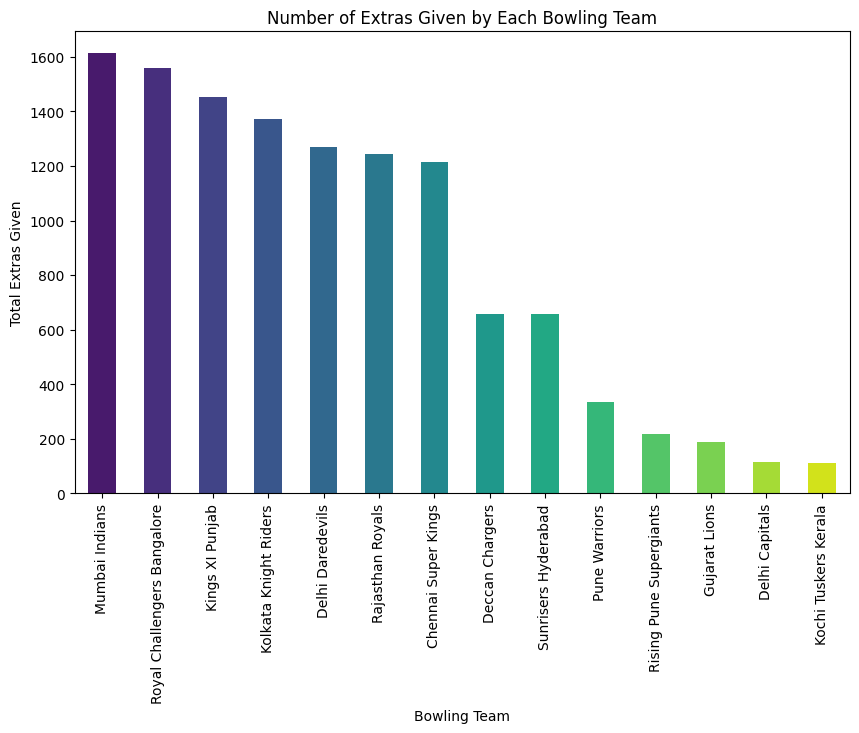

In [23]:
import seaborn as sns

extras_given = ipl.groupby('Bowling_Team')['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs'].sum()
extras_given['Total_extras'] = extras_given.sum(axis=1)

# Sort the data in descending order of total extras given
extras_given = extras_given.sort_values('Total_extras', ascending=False)

# Create a bar graph to visualize the number of extras given by each bowling team
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', len(extras_given))
extras_given['Total_extras'].plot(kind='bar', color=colors)
plt.xlabel('Bowling Team')
plt.ylabel('Total Extras Given')
plt.title('Number of Extras Given by Each Bowling Team')
plt.xticks(rotation=90)
plt.show()

#### Mumbai Indians, Royal Challengers Bangalore, Kings XI Punjab have been pretty indisciplined with ball in their hand by conceding most amount of extras among other teams